# MLflow Logging API Quickstart (Python)

This notebook illustrates how to use the MLflow logging API to start an MLflow run and log the model, model parameters, evaluation metrics, and other run artifacts to the run. The easiest way to get started using MLflow tracking with Python is to use the MLflow [`autolog()` API](https://www.mlflow.org/docs/latest/tracking.html#automatic-logging). If you need more control over the metrics logged for each training run, or want to log additional artifacts such as tables or plots, you can use the `mlflow.log_metric()` and `mlflow.log_artifact()` APIs demonstrated in this notebook. 

## Setup
* If you are using a cluster running Databricks Runtime, you must install the mlflow library from PyPI. See Cmd 3.
* If you are using a cluster running Databricks Runtime ML, the mlflow library is already installed. 

This notebook creates a Random Forest model on a simple dataset and uses the MLflow Tracking API to log the model and selected model parameters and metrics.

Install the mlflow library. 
This is required for Databricks Runtime clusters only. If you are using a cluster running Databricks Runtime ML, skip to Cmd 4.

In [0]:
# If you are running Databricks Runtime version 7.1 or above, uncomment this line and run this cell:
#%pip install mlflow

# If you are running Databricks Runtime version 6.4 to 7.0, uncomment this line and run this cell:
#dbutils.library.installPyPI("mlflow")

Import the required libraries.

In [0]:
import mlflow
import mlflow.sklearn
import pandas as pd
import matplotlib.pyplot as plt

from numpy import savetxt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Import the dataset from scikit-learn and create the training and test datasets.

In [0]:
db = load_diabetes()
X = db.data
y = db.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

Create a random forest model and log the model, model parameters, evaluation metrics, and other artifacts using `mlflow.log_param()`, `mlflow.log_metric()`, `mlflow.log_model()`, and `mlflow.log_artifact()`. These functions let you control exactly which parameters and metrics are logged, and also let you log other artifacts of the run such as tables and plots.

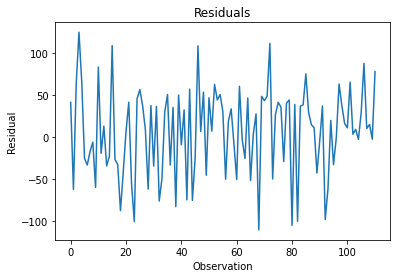

In [0]:
with mlflow.start_run():
  
  # Set the model parameters. 
  n_estimators = 100
  max_depth = 6
  max_features = 3
  
  # Create and train model.
  rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
  rf.fit(X_train, y_train)
  
  # Use the model to make predictions on the test dataset.
  predictions = rf.predict(X_test)
  
  # Log the model parameters used for this run.
  mlflow.log_param("num_trees", n_estimators)
  mlflow.log_param("maxdepth", max_depth)
  mlflow.log_param("max_feat", max_features)
  
  # Define a metric to use to evaluate the model.
  mse = mean_squared_error(y_test, predictions)
    
  # Log the value of the metric from this run.
  mlflow.log_metric("mse", mse)
  
  # Log the model created by this run.
  mlflow.sklearn.log_model(rf, "random-forest-model") 
  
  # Save the table of predicted values
  savetxt('predictions.csv', predictions, delimiter=',')
  
  # Log the saved table as an artifact
  mlflow.log_artifact("predictions.csv")
  
  # Convert the residuals to a pandas dataframe to take advantage of graphics capabilities
  df = pd.DataFrame(data = predictions - y_test)
  
  # Create a plot of residuals
  plt.plot(df)
  plt.xlabel("Observation")
  plt.ylabel("Residual")
  plt.title("Residuals")

  # Save the plot and log it as an artifact
  
  plt.savefig("residuals_plot.png")
  mlflow.log_artifact("residuals_plot.png") 

To view the results, click **Experiment** at the upper right of this page. The Experiments sidebar appears. This sidebar displays the parameters and metrics for each run of this notebook. Click the circular arrows icon to refresh the display to include the latest runs. 

When you click the square icon with the arrow to the right of the date and time of the run, the Runs page opens in a new tab. This page shows all of the information that was logged from the run. Scroll down to the Artifacts section to find the logged model, table, and plot.

For more information, see View results ([AWS](https://docs.databricks.com/applications/mlflow/quick-start-python.html#view-results)|[Azure](https://docs.microsoft.com/azure/databricks/applications/mlflow/quick-start-python#view-results)|[GCP](https://docs.gcp.databricks.com/applications/mlflow/quick-start-python.html#view-results)).